### 1. Calculating Correlation

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
a = pd.Series([1, 2, 3, 4])
b = pd.Series([10, 20, 30, 40])
c = pd.Series([10, 30, 20, 40])
d = pd.Series([40, 30, 20, 10])
e = pd.Series([20, 90, 10, 50])
def standardize_data(values):
    mean = values.mean()
    std = values.std(ddof = 0)
    return (values - mean)/std
def correlation(x, y):
    '''
    Fill in this function to compute the correlation between the two
    input variables. Each input is either a NumPy array or a Pandas
    Series.
    
    correlation = average of (x in standard units) times (y in standard units)
    
    Remember to pass the argument "ddof=0" to the Pandas std() function!
    '''
    standard_x = standardize_data(x)
    standard_y = standardize_data(y) 
    return (standard_x*standard_y).mean()

print(correlation(a, b))
print(correlation(a, c))
print(correlation(a, d))
print(correlation(a, e))

1.0
0.8
-1.0
0.0359210604054


### 2. DataFrame Vectorized Operations

In [18]:
# Examples of vectorized operations on DataFrames:
# Change False to True for each block of code to see what it does

# Adding DataFrames with the column names
if False:
    df1 = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6], 'c': [7, 8, 9]})
    df2 = pd.DataFrame({'a': [10, 20, 30], 'b': [40, 50, 60], 'c': [70, 80, 90]})
    print (df1 + df2)
    
# Adding DataFrames with overlapping column names 
if False:
    df1 = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6], 'c': [7, 8, 9]})
    df2 = pd.DataFrame({'d': [10, 20, 30], 'c': [40, 50, 60], 'b': [70, 80, 90]})
    print (df1 + df2)

# Adding DataFrames with overlapping row indexes
if False:
    df1 = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6], 'c': [7, 8, 9]},
                       index=['row1', 'row2', 'row3'])
    df2 = pd.DataFrame({'a': [10, 20, 30], 'b': [40, 50, 60], 'c': [70, 80, 90]},
                       index=['row4', 'row3', 'row2'])
    print (df1 + df2)

# --- Quiz ---
# Cumulative entries and exits for one station for a few hours.
entries_and_exits = pd.DataFrame({
    'ENTRIESn': [3144312, 3144335, 3144353, 3144424, 3144594,
                 3144808, 3144895, 3144905, 3144941, 3145094],
    'EXITSn': [1088151, 1088159, 1088177, 1088231, 1088275,
               1088317, 1088328, 1088331, 1088420, 1088753]
})

def get_hourly_entries_and_exits(entries_and_exits):
    '''
    Fill in this function to take a DataFrame with cumulative entries
    and exits (entries in the first column, exits in the second) and
    return a DataFrame with hourly entries and exits (entries in the
    first column, exits in the second).
    '''
    return entries_and_exits - entries_and_exits.shift(1)
get_hourly_entries_and_exits(entries_and_exits)

,ENTRIESn,EXITSn
0,NaN,NaN
1,23.0,8.0
2,18.0,18.0
3,71.0,54.0
4,170.0,44.0
5,214.0,42.0
6,87.0,11.0
7,10.0,3.0
8,36.0,89.0
9,153.0,333.0


### 3. DataFrame applymap()

In [20]:
# Change False to True for this block of code to see what it does

# DataFrame applymap()
if False:
    df = pd.DataFrame({
        'a': [1, 2, 3],
        'b': [10, 20, 30],
        'c': [5, 10, 15]
    })
    
    def add_one(x):
        return x + 1
        
    print (df.applymap(add_one))
    
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)
def convert_grade(grade):
    if grade >= 90 and grade <=100:
        return 'A'
    elif grade >= 80:
        return 'B'
    elif grade >= 70:
        return 'C'
    elif grade >= 60:
        return 'D'
    else:
        return 'F'
def convert_grades(grades):
    '''
    Fill in this function to convert the given DataFrame of numerical
    grades to letter grades. Return a new DataFrame with the converted
    grade.
    
    The conversion rule is:
        90-100 -> A
        80-89  -> B
        70-79  -> C
        60-69  -> D
        0-59   -> F
    '''
    return grades.applymap(convert_grade)
print(convert_grades(grades_df))

        exam1 exam2
Andre       F     F
Barry       B     D
Chris       C     F
Dan         C     F
Emilio      B     D
Fred        C     F
Greta       A     C
Humbert     D     F
Ivan        A     C
James       B     D


### 4. DataFrame apply()

In [21]:
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)

# Change False to True for this block of code to see what it does

# DataFrame apply()
if True:
    def convert_grades_curve(exam_grades):
        # Pandas has a bult-in function that will perform this calculation
        # This will give the bottom 0% to 10% of students the grade 'F',
        # 10% to 20% the grade 'D', and so on. You can read more about
        # the qcut() function here:
        # http://pandas.pydata.org/pandas-docs/stable/generated/pandas.qcut.html
        return pd.qcut(exam_grades,
                       [0, 0.1, 0.2, 0.5, 0.8, 1],
                       labels=['F', 'D', 'C', 'B', 'A'])
        
    # qcut() operates on a list, array, or Series. This is the
    # result of running the function on a single column of the
    # DataFrame.
    print (convert_grades_curve(grades_df['exam1']))
    print (convert_grades_curve(grades_df['exam2']))
    # qcut() does not work on DataFrames, but we can use apply()
    # to call the function on each column separately
    print (grades_df.apply(convert_grades_curve))
    
def standardize(df):
    '''
    Fill in this function to standardize each column of the given
    DataFrame. To standardize a variable, convert each value to the
    number of standard deviations it is above or below the mean.
    '''
    df_mean = df.mean()
    df_std = df.std(ddof = 0)
    
    return (df - df_mean)/df_std
print(standardize(grades_df))

Andre      F
Barry      B
Chris      C
Dan        C
Emilio     B
Fred       C
Greta      A
Humbert    D
Ivan       A
James      B
Name: exam1, dtype: category
Categories (5, object): [F < D < C < B < A]
Andre      F
Barry      B
Chris      C
Dan        C
Emilio     B
Fred       C
Greta      A
Humbert    D
Ivan       A
James      B
Name: exam2, dtype: category
Categories (5, object): [F < D < C < B < A]
        exam1 exam2
Andre       F     F
Barry       B     B
Chris       C     C
Dan         C     C
Emilio      B     B
Fred        C     C
Greta       A     A
Humbert     D     D
Ivan        A     A
James       B     B
            exam1     exam2
Andre   -2.315341 -2.304599
Barry    0.220191  0.386400
Chris    0.020017 -0.096600
Dan     -0.180156 -0.096600
Emilio   0.753987  0.662400
Fred    -0.513779 -0.441600
Greta    0.887436  1.490400
Humbert -0.847401 -0.786600
Ivan     1.354508  1.007400
James    0.620538  0.179400


### 5. DataFrame apply() Use Case 2

In [23]:
df = pd.DataFrame({
    'a': [4, 5, 3, 1, 2],
    'b': [20, 10, 40, 50, 30],
    'c': [25, 20, 5, 15, 10]
})

# Change False to True for this block of code to see what it does

# DataFrame apply() - use case 2
if False:   
    print (df.apply(np.mean))
    print (df.apply(np.max))

def sec_large(series):
    sorted = series.sort_values()
    return sorted.values[-2]

def second_largest(df):
    '''
    Fill in this function to return the second-largest value of each 
    column of the input DataFrame.
    '''
    return df.apply(sec_large)
print(second_largest(df))

a     4
b    40
c    20
dtype: int64


### 6. Adding a DataFrame to a Series

In [24]:
# Change False to True for each block of code to see what it does

# Adding a Series to a square DataFrame
if False:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({
        0: [10, 20, 30, 40],
        1: [50, 60, 70, 80],
        2: [90, 100, 110, 120],
        3: [130, 140, 150, 160]
    })
    
    print (df)
    print ('') # Create a blank line between outputs
    print (df + s)
    
# Adding a Series to a one-row DataFrame 
if False:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({0: [10], 1: [20], 2: [30], 3: [40]})
    
    print (df)
    print ('') # Create a blank line between outputs
    print (df + s)

# Adding a Series to a one-column DataFrame
if False:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({0: [10, 20, 30, 40]})
    
    print (df)
    print ('') # Create a blank line between outputs
    print (df + s)
    

    
# Adding when DataFrame column names match Series index
if False:
    s = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
    df = pd.DataFrame({
        'a': [10, 20, 30, 40],
        'b': [50, 60, 70, 80],
        'c': [90, 100, 110, 120],
        'd': [130, 140, 150, 160]
    })
    
    print (df)
    print ('') # Create a blank line between outputs
    print (df + s)
    
# Adding when DataFrame column names don't match Series index
if True:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({
        'a': [10, 20, 30, 40],
        'b': [50, 60, 70, 80],
        'c': [90, 100, 110, 120],
        'd': [130, 140, 150, 160]
    })
    
    print (df)
    print ('') # Create a blank line between outputs
    print (df + s)

    a   b    c    d
0  10  50   90  130
1  20  60  100  140
2  30  70  110  150
3  40  80  120  160

    a   b   c   d   0   1   2   3
0 NaN NaN NaN NaN NaN NaN NaN NaN
1 NaN NaN NaN NaN NaN NaN NaN NaN
2 NaN NaN NaN NaN NaN NaN NaN NaN
3 NaN NaN NaN NaN NaN NaN NaN NaN


### 7. Standardizing Each Column Again

In [25]:
# Adding using +
if False:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({
        0: [10, 20, 30, 40],
        1: [50, 60, 70, 80],
        2: [90, 100, 110, 120],
        3: [130, 140, 150, 160]
    })
    
    print (df)
    print ('') # Create a blank line between outputs
    print (df + s)
    
# Adding with axis='index'
if False:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({
        0: [10, 20, 30, 40],
        1: [50, 60, 70, 80],
        2: [90, 100, 110, 120],
        3: [130, 140, 150, 160]
    })
    
    print (df)
    print ('') # Create a blank line between outputs
    print (df.add(s, axis='index'))
    # The functions sub(), mul(), and div() work similarly to add()
    
# Adding with axis='columns'
if False:
    s = pd.Series([1, 2, 3, 4])
    df = pd.DataFrame({
        0: [10, 20, 30, 40],
        1: [50, 60, 70, 80],
        2: [90, 100, 110, 120],
        3: [130, 140, 150, 160]
    })
    
    print (df)
    print ('') # Create a blank line between outputs
    print (df.add(s, axis='columns'))
    # The functions sub(), mul(), and div() work similarly to add()
    
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James']
)

def standardize(df):
    '''
    Fill in this function to standardize each column of the given
    DataFrame. To standardize a variable, convert each value to the
    number of standard deviations it is above or below the mean.
    
    This time, try to use vectorized operations instead of apply().
    You should get the same results as you did before.
    '''
    df_mean = df.mean()
    df_std = df.std(ddof = 0)
    return (df - df_mean)/df_std
print(standardize(grades_df))
def standardize_rows(df):
    '''
    Optional: Fill in this function to standardize each row of the given
    DataFrame. Again, try not to use apply().
    
    This one is more challenging than standardizing each column!
    '''
    df_mean = df.mean(axis = 'columns')
    df_std = df.std(ddof = 0, axis = 'columns')
    subst = df.sub(df_mean, axis = 'index')
    return subst.div(df_std, axis = 'index')
print("")
print(standardize_rows(grades_df))

            exam1     exam2
Andre   -2.315341 -2.304599
Barry    0.220191  0.386400
Chris    0.020017 -0.096600
Dan     -0.180156 -0.096600
Emilio   0.753987  0.662400
Fred    -0.513779 -0.441600
Greta    0.887436  1.490400
Humbert -0.847401 -0.786600
Ivan     1.354508  1.007400
James    0.620538  0.179400

         exam1  exam2
Andre      1.0   -1.0
Barry      1.0   -1.0
Chris      1.0   -1.0
Dan        1.0   -1.0
Emilio     1.0   -1.0
Fred       1.0   -1.0
Greta      1.0   -1.0
Humbert    1.0   -1.0
Ivan       1.0   -1.0
James      1.0   -1.0


### 8. Pandas groupby()

rain
0    1845.539439
1    2028.196035
Name: ENTRIESn_hourly, dtype: float64


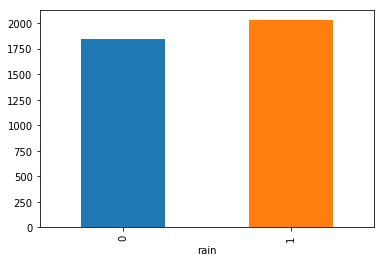

In [28]:
values = np.array([1, 3, 2, 4, 1, 6, 4])
example_df = pd.DataFrame({
    'value': values,
    'even': values % 2 == 0,
    'above_three': values > 3 
}, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

# Change False to True for each block of code to see what it does

# Examine DataFrame
if False:
    print (example_df)
    
# Examine groups
if False:
    grouped_data = example_df.groupby('even')
    # The groups attribute is a dictionary mapping keys to lists of row indexes
    print (grouped_data.groups)
    
# Group by multiple columns
if False:
    grouped_data = example_df.groupby(['even', 'above_three'])
    print (grouped_data.groups)
    
# Get sum of each group
if False:
    grouped_data = example_df.groupby('even')
    print (grouped_data.sum())
    
# Limit columns in result
if False:
    grouped_data = example_df.groupby('even')
    
    # You can take one or more columns from the result DataFrame
    print (grouped_data.sum()['value'])
    
    print ('\n') # Blank line to separate results
    
    # You can also take a subset of columns from the grouped data before 
    # collapsing to a DataFrame. In this case, the result is the same.
    print (grouped_data['value'].sum())
    
filename = 'nyc_subway_weather.csv'
subway_df = pd.read_csv(filename)

### Write code here to group the subway data by a variable of your choice, then
### either print out the mean ridership within each group or create a plot.
#print(list(subway_df))
temp_data = subway_df.groupby('rain').mean()['ENTRIESn_hourly']
print(temp_data)
#%pylab inline
import seaborn as sns
temp_data.plot.bar()

### 9. Calculating Hourly Entries and Exits

In [29]:
values = np.array([1, 3, 2, 4, 1, 6, 4])
example_df = pd.DataFrame({
    'value': values,
    'even': values % 2 == 0,
    'above_three': values > 3 
}, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

# Change False to True for each block of code to see what it does

# Standardize each group
if False:
    def standardize(xs):
        return (xs - xs.mean()) / xs.std()
    grouped_data = example_df.groupby('even')
    print (grouped_data['value'].apply(standardize))
    
# Find second largest value in each group
if False:
    def second_largest(xs):
        sorted_xs = xs.sort(inplace=False, ascending=False)
        return sorted_xs.iloc[1]
    grouped_data = example_df.groupby('even')
    print (grouped_data['value'].apply(second_largest))

# --- Quiz ---
# DataFrame with cumulative entries and exits for multiple stations
ridership_df = pd.DataFrame({
    'UNIT': ['R051', 'R079', 'R051', 'R079', 'R051', 'R079', 'R051', 'R079', 'R051'],
    'TIMEn': ['00:00:00', '02:00:00', '04:00:00', '06:00:00', '08:00:00', '10:00:00', '12:00:00', '14:00:00', '16:00:00'],
    'ENTRIESn': [3144312, 8936644, 3144335, 8936658, 3144353, 8936687, 3144424, 8936819, 3144594],
    'EXITSn': [1088151, 13755385,  1088159, 13755393,  1088177, 13755598, 1088231, 13756191,  1088275]
})
def shift_values(entries_and_exits):
    '''
    Fill in this function to take a DataFrame with cumulative entries
    and exits (entries in the first column, exits in the second) and
    return a DataFrame with hourly entries and exits (entries in the
    first column, exits in the second).
    '''
    return entries_and_exits - entries_and_exits.shift(1)
    
def get_hourly_entries_and_exits(entries_and_exits):
    '''
    Fill in this function to take a DataFrame with cumulative entries
    and exits and return a DataFrame with hourly entries and exits.
    The hourly entries and exits should be calculated separately for
    each station (the 'UNIT' column).
    
    Hint: Take a look at the `get_hourly_entries_and_exits()` function
    you wrote in a previous quiz, DataFrame Vectorized Operations. If
    you copy it here and rename it, you can use it and the `.apply()`
    function to help solve this problem.
    '''
    return entries_and_exits.groupby('UNIT')['ENTRIESn','EXITSn'].apply(shift_values)
print(get_hourly_entries_and_exits(ridership_df))

   ENTRIESn  EXITSn
0       NaN     NaN
1       NaN     NaN
2      23.0     8.0
3      14.0     8.0
4      18.0    18.0
5      29.0   205.0
6      71.0    54.0
7     132.0   593.0
8     170.0    44.0


### 10. Combining Pandas DataFrames

In [30]:
subway_df = pd.DataFrame({
    'UNIT': ['R003', 'R003', 'R003', 'R003', 'R003', 'R004', 'R004', 'R004',
             'R004', 'R004'],
    'DATEn': ['05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11',
              '05-01-11', '05-02-11', '05-03-11', '05-04-11', '05-05-11'],
    'hour': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'ENTRIESn': [ 4388333,  4388348,  4389885,  4391507,  4393043, 14656120,
                 14656174, 14660126, 14664247, 14668301],
    'EXITSn': [ 2911002,  2911036,  2912127,  2913223,  2914284, 14451774,
               14451851, 14454734, 14457780, 14460818],
    'latitude': [ 40.689945,  40.689945,  40.689945,  40.689945,  40.689945,
                  40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ,  40.69132 ],
    'longitude': [-73.872564, -73.872564, -73.872564, -73.872564, -73.872564,
                  -73.867135, -73.867135, -73.867135, -73.867135, -73.867135]
})

weather_df = pd.DataFrame({
    'DATEn': ['05-01-11', '05-01-11', '05-02-11', '05-02-11', '05-03-11',
              '05-03-11', '05-04-11', '05-04-11', '05-05-11', '05-05-11'],
    'hour': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'latitude': [ 40.689945,  40.69132 ,  40.689945,  40.69132 ,  40.689945,
                  40.69132 ,  40.689945,  40.69132 ,  40.689945,  40.69132 ],
    'longitude': [-73.872564, -73.867135, -73.872564, -73.867135, -73.872564,
                  -73.867135, -73.872564, -73.867135, -73.872564, -73.867135],
    'pressurei': [ 30.24,  30.24,  30.32,  30.32,  30.14,  30.14,  29.98,  29.98,
                   30.01,  30.01],
    'fog': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'rain': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'tempi': [ 52. ,  52. ,  48.9,  48.9,  54. ,  54. ,  57.2,  57.2,  48.9,  48.9],
    'wspdi': [  8.1,   8.1,   6.9,   6.9,   3.5,   3.5,  15. ,  15. ,  15. ,  15. ]
})

def combine_dfs(subway_df, weather_df):
    '''
    Fill in this function to take 2 DataFrames, one with subway data and one with weather data,
    and return a single dataframe with one row for each date, hour, and location. Only include
    times and locations that have both subway data and weather data available.
    '''
    return subway_df.merge(weather_df, on = ['DATEn', 'hour', 'latitude', 'longitude'], how = 'inner')
print(combine_dfs(subway_df, weather_df))

      DATEn  ENTRIESn    EXITSn  UNIT  hour   latitude  longitude  fog  \
0  05-01-11   4388333   2911002  R003     0  40.689945 -73.872564    0   
1  05-02-11   4388348   2911036  R003     0  40.689945 -73.872564    0   
2  05-03-11   4389885   2912127  R003     0  40.689945 -73.872564    0   
3  05-04-11   4391507   2913223  R003     0  40.689945 -73.872564    0   
4  05-05-11   4393043   2914284  R003     0  40.689945 -73.872564    0   
5  05-01-11  14656120  14451774  R004     0  40.691320 -73.867135    0   
6  05-02-11  14656174  14451851  R004     0  40.691320 -73.867135    0   
7  05-03-11  14660126  14454734  R004     0  40.691320 -73.867135    0   
8  05-04-11  14664247  14457780  R004     0  40.691320 -73.867135    0   
9  05-05-11  14668301  14460818  R004     0  40.691320 -73.867135    0   

   pressurei  rain  tempi  wspdi  
0      30.24     0   52.0    8.1  
1      30.32     0   48.9    6.9  
2      30.14     0   54.0    3.5  
3      29.98     0   57.2   15.0  
4      30.

### 11. Plotting for DataFrames

In [32]:
values = np.array([1, 3, 2, 4, 1, 6, 4])
example_df = pd.DataFrame({
    'value': values,
    'even': values % 2 == 0,
    'above_three': values > 3 
}, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

# Change False to True for this block of code to see what it does

# groupby() without as_index
if False:
    first_even = example_df.groupby('even').first()
    print (first_even)
    print (first_even['even']) # Causes an error. 'even' is no longer a column in the DataFrame
    
# groupby() with as_index=False
if False:
    first_even = example_df.groupby('even', as_index=False).first()
    print (first_even)
    print (first_even['even']) # Now 'even' is still a column in the DataFrame

filename = 'nyc_subway_weather.csv'
subway_df = pd.read_csv(filename)

## Make a plot of your choice here showing something interesting about the subway data.
## Matplotlib documentation here: http://matplotlib.org/api/pyplot_api.html
## Once you've got something you're happy with, share it on the forums!